# EDA/STATS MINI PROJECT 1

### Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import scipy.stats as stats 
import random
import sweetviz as sv
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from statsmodels.stats import weightstats

## PART B

• PROJECT OBJECTIVE: Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by
6
 the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.


### 1. Read the data set, clean the data and prepare a final dataset to be used for analysis.

In [4]:
df = pd.read_csv('National_Stock_Exchange_of_India_Ltd.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'National_Stock_Exchange_of_India_Ltd.csv'

In [32]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [33]:
# It can be observed that the data has a lot of values where '-' is used instead of a numeric value. 
# since the data is not given, for a better reading in the further analysis we replace the value with np.nan
df = ds.replace('-',np.nan)
df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,NaN,NaN,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,NaN,NaN,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,NaN,NaN,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,NaN,NaN,1955-56,15


In [34]:
# In the original data columns with integer values have been given object datatype
# Using the below syntax we change them to their suitable datatype

df[['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up']]=df[['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up']].apply(pd.to_numeric)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 61 non-null     object 
 1   Tournament           61 non-null     int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   9 non-null      float64
 10  Runner-up            13 non-null     float64
 11  TeamLaunch           61 non-null     object 
 12  HighestPositionHeld  61 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ KB


In [36]:
df.isnull().mean()

Team                   0.000000
Tournament             0.000000
Score                  0.016393
PlayedGames            0.016393
WonGames               0.016393
DrawnGames             0.016393
LostGames              0.016393
BasketScored           0.016393
BasketGiven            0.016393
TournamentChampion     0.852459
Runner-up              0.786885
TeamLaunch             0.000000
HighestPositionHeld    0.000000
dtype: float64

In [37]:
df['TeamLaunch'] = df['TeamLaunch'].map(lambda x : x[0:4])
df.head(5)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1


### 2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data.

#### a. Find the correlation between the columns of the dataset.

In [38]:
df_num = df.select_dtypes(include = np.number)

<AxesSubplot:>

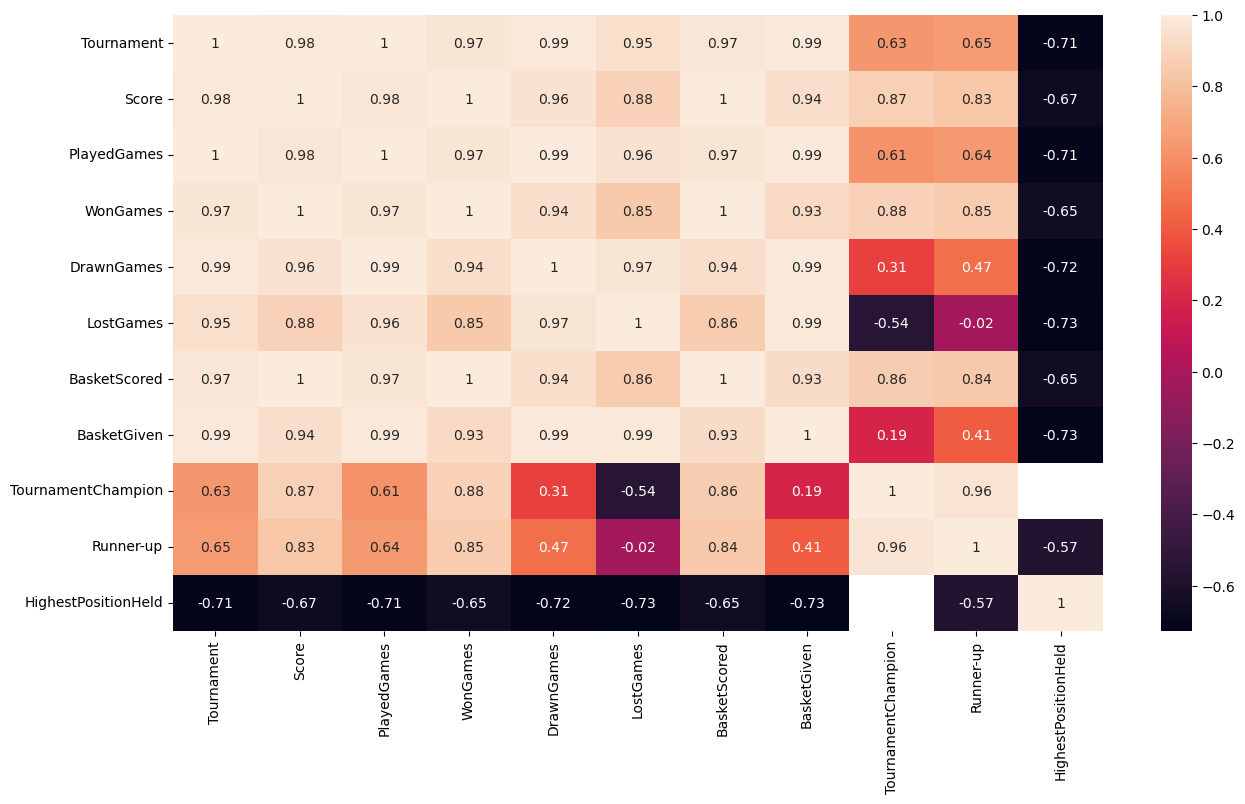

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(df_num.corr(),annot = True)

It can be observed that the columns Score, Tournament, games played, games won, games drawn, games lost, basket given and basket scored share shares a pretty strong correlation with each other.

#### b.Teams who scored the highest throughout all the tournaments

In [40]:
df['Tournament'].unique()

array([86, 80, 82, 73, 70, 58, 51, 45, 42, 44, 43, 37, 36, 38, 27, 33, 17,
       23, 21, 12, 20, 13, 18, 11, 14,  9,  7,  6,  4,  5,  3,  2,  1],
      dtype=int64)

<AxesSubplot:xlabel='Team'>

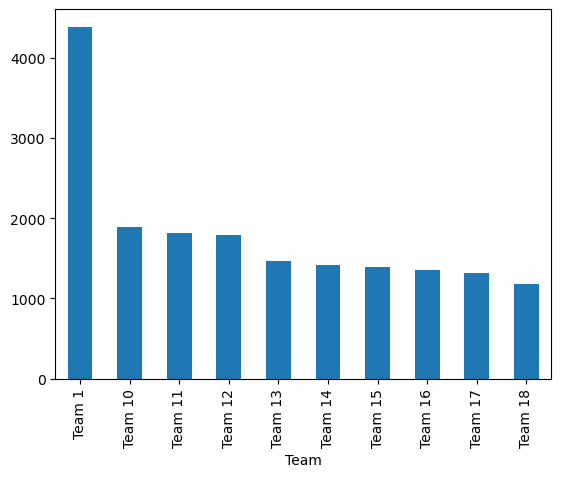

In [41]:
df.groupby('Team')['Score'].max().head(10).plot(kind = 'bar')

#### c.Teams who scored the most baskets

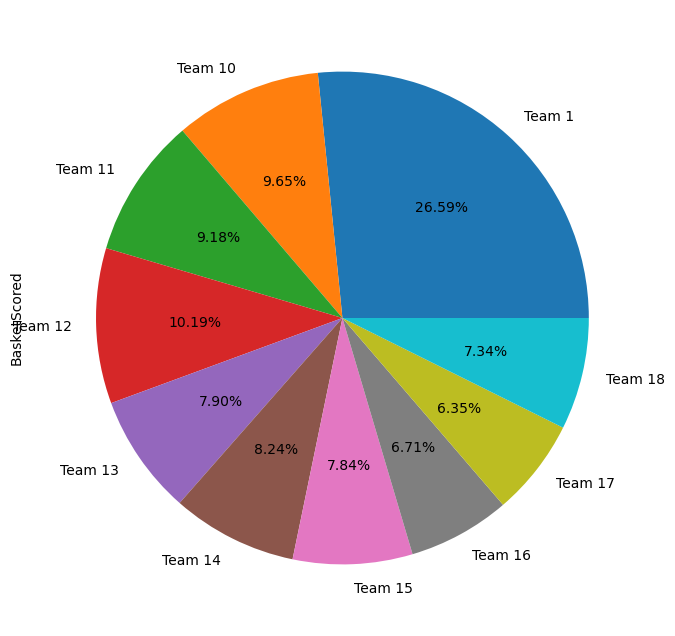

In [42]:
plt.figure(figsize = (15,8))
df.groupby('Team')['BasketScored'].max().head(10).plot(kind = 'pie',autopct = '%1.2f%%')
plt.show()

#### d. Teams who gave the most number of baskets in tournaments overall

<AxesSubplot:xlabel='Team'>

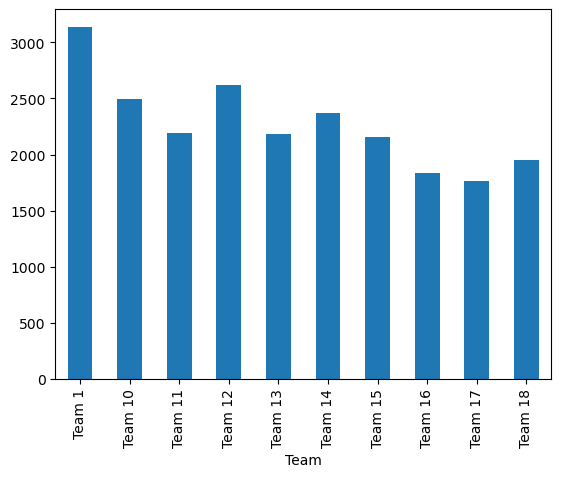

In [43]:
df.groupby('Team')['BasketGiven'].max().head(10).plot(kind = 'bar')

In [44]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

#### e. relation between played games and wongames by teams

<Figure size 2000x2000 with 0 Axes>

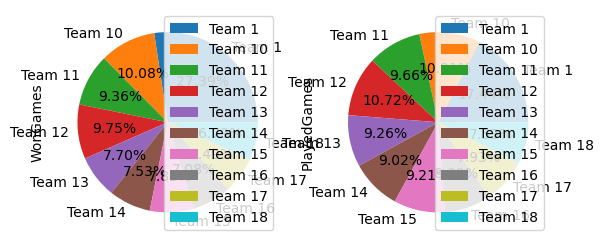

In [45]:
plt.figure(figsize = (20,20))
df.groupby('Team')['WonGames','PlayedGames'].max().head(10).plot(kind = 'pie',autopct = '%1.2f%%',subplots = True)
plt.show()

### f. we will now calculate the winning percentage according to the following formula: wins+ 0.5*ties/total games * 100%

In [47]:
x=0
df['win%']=0
for x in range(61):
    df['win%'].iloc[x]=( (df['WonGames'].iloc[x]+ 0.5* df['DrawnGames'].iloc[x])/ df['PlayedGames'].iloc[x])*100
df.replace(np.nan, 0)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,win%
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1,69.623461
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1,67.614048
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1,58.913542
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1,56.118619
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1,55.231716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34.0,38.0,8.0,10.0,20.0,38.0,66.0,0.0,0.0,2009,20,34.210526
57,Team 58,1,22.0,30.0,7.0,8.0,15.0,37.0,57.0,0.0,0.0,1956,16,36.666667
58,Team 59,1,19.0,30.0,7.0,5.0,18.0,51.0,85.0,0.0,0.0,1951,16,31.666667
59,Team 60,1,14.0,30.0,5.0,4.0,21.0,34.0,65.0,0.0,0.0,1955,15,23.333333


#### g. Teams with lowest performance

<AxesSubplot:xlabel='Team', ylabel='LostGames'>

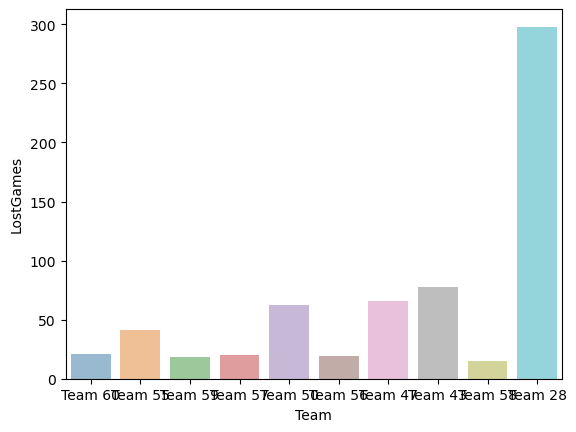

In [48]:
sns.barplot(data = df.nsmallest(10, 'win%'), x='Team', y='LostGames', alpha=0.5)

#### h.Teams with higest performance

<AxesSubplot:xlabel='Team', ylabel='LostGames'>

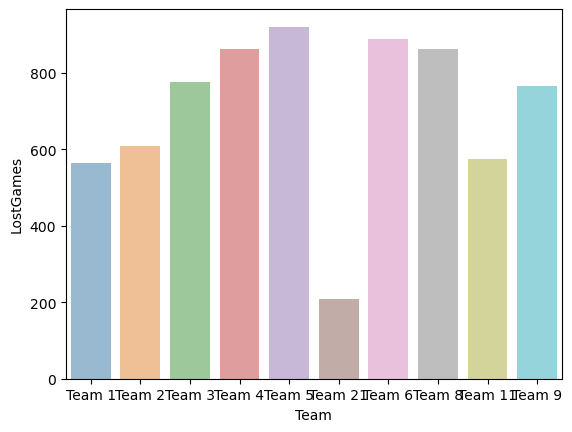

In [49]:
sns.barplot(data = df.nlargest(10, 'win%'), x='Team', y='LostGames', alpha=0.5)

#### i. finding outlieallrs 

<AxesSubplot:xlabel='WonGames'>

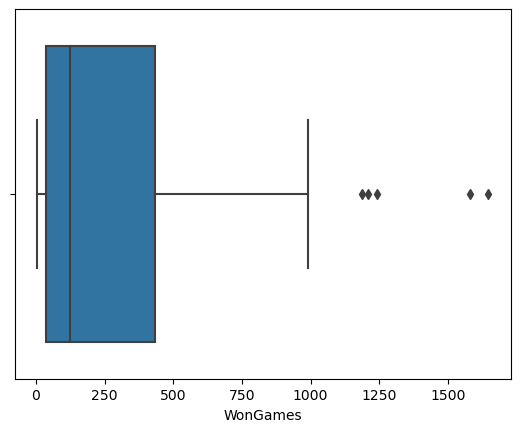

In [55]:
sns.boxplot(df['WonGames'])


#### k.Creating datafarme according to the team won and winpercent
#### and ploting the pie chart for teams won the most champion trophies in tournament

In [57]:
df_wongames= df.nlargest(20, ['WonGames'])
df_wongames['TeamLaunch'] = df_wongames['TeamLaunch'].apply(pd.to_numeric)
df_wongames

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,win%
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1,69.623461
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1,67.614048
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1,58.913542
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1,55.231716
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1,56.118619
5,Team 6,73,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1,52.138704
6,Team 7,82,2792.0,2626.0,948.0,608.0,1070.0,3609.0,3889.0,NaN,NaN,1929,3,47.677075
7,Team 8,70,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1,50.065161
8,Team 9,58,2109.0,1986.0,698.0,522.0,766.0,2683.0,2847.0,NaN,1.0,1939,2,48.288016
9,Team 10,51,1884.0,1728.0,606.0,440.0,682.0,2159.0,2492.0,1.0,NaN,1932,1,47.800926


In [63]:
df_winpercent = df.nlargest(20, 'win%')
df_winpercent['TeamLaunch'] = df_winpercent['TeamLaunch'].apply(pd.to_numeric)
df_winpercent

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,win%
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1,69.623461
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1,67.614048
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1,58.913542
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1,56.118619
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1,55.231716
20,Team 21,17,970.0,646.0,266.0,172.0,208.0,892.0,789.0,NaN,1.0,1998,2,54.489164
5,Team 6,73,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1,52.138704
7,Team 8,70,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1,50.065161
10,Team 11,45,1814.0,1530.0,563.0,392.0,575.0,2052.0,2188.0,1.0,5.0,1941,1,49.607843
8,Team 9,58,2109.0,1986.0,698.0,522.0,766.0,2683.0,2847.0,NaN,1.0,1939,2,48.288016


In [68]:
intersected_df = pd.merge(df_wongames, df_winpercent, how='inner')
intersected_df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,win%
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1,69.623461
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1,67.614048
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1,58.913542
3,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1,55.231716
4,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1,56.118619
5,Team 6,73,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1,52.138704
6,Team 7,82,2792.0,2626.0,948.0,608.0,1070.0,3609.0,3889.0,NaN,NaN,1929,3,47.677075
7,Team 8,70,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1,50.065161
8,Team 9,58,2109.0,1986.0,698.0,522.0,766.0,2683.0,2847.0,NaN,1.0,1939,2,48.288016
9,Team 10,51,1884.0,1728.0,606.0,440.0,682.0,2159.0,2492.0,1.0,NaN,1932,1,47.800926


plt.pie(intersected_df['TournamentChampion'].head(), labels= intersected_df['Team'].head())
plt.title('Teams with most Tournament champion trophies')
plt.show()

# .l top 10 team luanch years

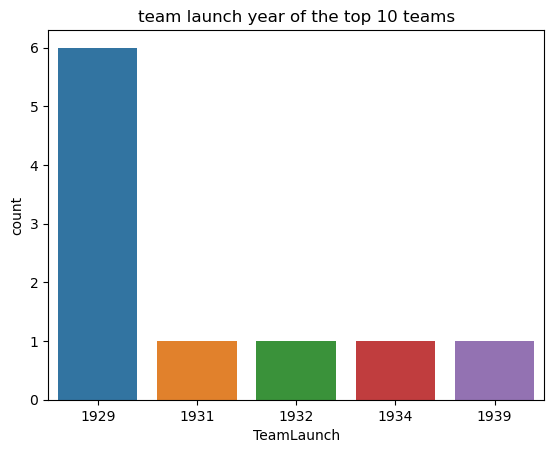

In [73]:
sns.countplot( 'TeamLaunch', data=intersected_df.head(10))
plt.title('team launch year of the top 10 teams')
plt.show()

In [87]:
intersected_df[['Team', 'win%', 'WonGames']]


,Team,win%,WonGames
0,Team 1,69.623461,1647.0
1,Team 2,67.614048,1581.0
2,Team 3,58.913542,1241.0
3,Team 5,55.231716,1209.0
4,Team 4,56.118619,1187.0
5,Team 6,52.138704,990.0
6,Team 7,47.677075,948.0
7,Team 8,50.065161,864.0
8,Team 9,48.288016,698.0
9,Team 10,47.800926,606.0


### 3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,veracity etc. on the data points collected by the association to perform a better data analysis in future.Submit a 200-500 words report to the management

# Quality:

#### Some of the columns had mixed data like TeamLaunch, 
#### special instructions can be mentioned while adding the data like 
#### only enter the year of team formation' to avoid this.

# Quantity:

#### Since our dataset had only 61 entries, we couldn
#### 't figure out more trends. We can include information about the players of each team, at least of the captains. 
#### It would have given us some information about the team's performance under different captains.

# Velocity:

#### efficient speed of data collection can be achieved 
#### if we maintain a regular record of the games, keep adding data after every match.

# Variety:

#### Again, more information about the 
#### team players can help us add variety to the data and will help us understand trends over the years.

# Conclusion:

#### Company X can approach the top 5 teams namely Team 1,2,3,4,5 since they have the highest score, 
#### max no of baskets scored, max winning % and most